In [22]:
import ale_py
import gymnasium as gym
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [23]:
def match_tp(img, template, thres=0.8, overlap_thres=0.1, x_range=[48, 200]):
    img = img[x_range[0] : x_range[1]]

    h, w = template.shape[:2]

    result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

    overlap_thres_h = max(int(h * overlap_thres), 1)
    overlap_thres_w = max(int(w * overlap_thres), 1)

    # (#match, 2)
    loc = np.vstack(np.where(result >= thres)).T

    if len(loc) == 0:
        return None

    loc = np.vstack(sorted(loc, key=lambda l: result[l[0]][l[1]], reverse=True))

    # move the points from the top left to the center of the shape
    loc += [h // 2, w // 2]

    filterd_loc = []

    for p1 in loc:
        overlapped = False
        for p2 in filterd_loc:
            # check overlap
            diff_h, diff_w = np.abs(p1 - p2)

            if diff_h < h - overlap_thres_h and diff_w < w - overlap_thres_w:
                overlapped = True

        if not overlapped:
            filterd_loc.append(p1)

    # then sort by position
    filterd_loc = sorted(filterd_loc, key=lambda x: (x[0], x[1]))

    return np.vstack(filterd_loc) + [x_range[0], 0]


def find_character(state):
    mask = (state[:, :] == 181) | (state[:, :] == 99)
    # remove the UI area
    mask[:35, :] = False

    t = np.where(mask)

    x, y = np.median(t[0]).astype(int), np.median(t[1]).astype(int)

    return np.array([x, y])

In [24]:
env = gym.make('ALE/MontezumaRevenge-v5', render_mode='rgb_array')

env = gym.wrappers.GrayscaleObservation(env)
# env = gym.wrappers.FrameStackObservation(env, 4)


# !mkdir templates/montezuma

In [25]:
state, _ = env.reset()
state.shape

(210, 160)

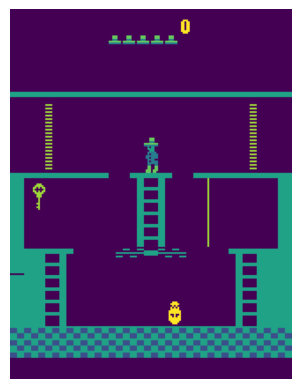

In [26]:
plt.imshow(state)
plt.axis('off')  # Hide the axis
plt.show()

(2, 2)


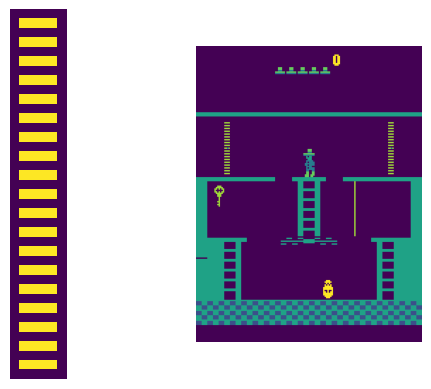

In [27]:
door_region = state[53:92, 19:25]

Image.fromarray(door_region).save("templates/montezuma/door.png")

t = match_tp(state, door_region, thres=0.7)

print(t.shape)

state_c = state.copy()
state_c[t[:, 0], t[:, 1]] = 128

plt.subplot(1, 2, 1)
plt.imshow(door_region)
plt.axis("off")  # Hide the axis

plt.subplot(1, 2, 2)
plt.imshow(state_c)
plt.axis("off")  # Hide the axis
plt.show()

(3, 2)


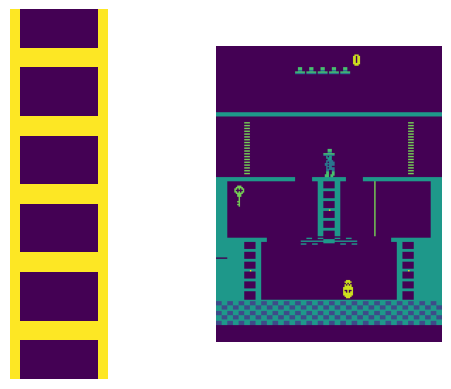

In [28]:
ladder_region = state[140:178, 19:29]

Image.fromarray(ladder_region).save("templates/montezuma/ladder.png")

t = match_tp(state, ladder_region, thres=0.7)

print(t.shape)

state_c = state.copy()
state_c[t[:, 0], t[:, 1]] = 255

plt.subplot(1, 2, 1)
plt.imshow(ladder_region)
plt.axis("off")  # Hide the axis

plt.subplot(1, 2, 2)
plt.imshow(state_c)
plt.axis("off")  # Hide the axis
plt.show()

(1, 2)


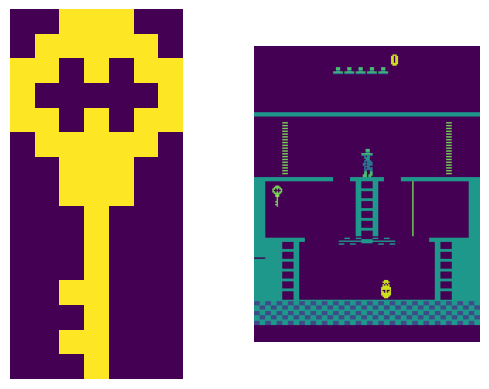

In [29]:
key_region = state[99:114, 13:20]

Image.fromarray(key_region).save("templates/montezuma/key.png")

t = match_tp(state, key_region, thres=0.7)

print(t.shape)

state_c = state.copy()
state_c[t[:, 0], t[:, 1]] = 255

plt.subplot(1, 2, 1)
plt.imshow(key_region)
plt.axis("off")  # Hide the axis

plt.subplot(1, 2, 2)
plt.imshow(state_c)
plt.axis("off")  # Hide the axis
plt.show()

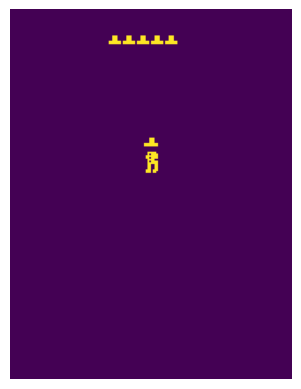

In [30]:
# state_c = state[73: 89, 77:84].copy()
mask = (state[:, :] == 181) | (state[:, :] == 99)

plt.imshow(mask)
plt.axis("off")  # Hide the axis
plt.show()

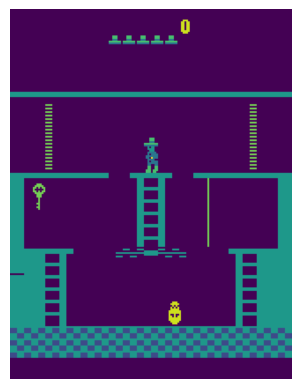

In [31]:
x, y = find_character(state)

state_c = state.copy()
state_c[x][y] = 255
plt.imshow(state_c)
plt.axis("off")  # Hide the axis
plt.show()

In [18]:
def find_skull(state):
    mask = (state[:, :] == [236,236,236]).all(-1)
    # remove the UI area
    mask[:35, :] = False

    t = np.where(mask)

    x, y = np.median(t[0]).astype(int), np.median(t[1]).astype(int)

    return np.array([x, y])

x, y = find_skull(state)

state_c = state.copy()
state_c[x][y] = [255, 0, 0]
plt.imshow(state_c)
plt.axis("off")  # Hide the axis
plt.show()

ValueError: operands could not be broadcast together with shapes (210,160) (3,) 

In [28]:
mask = (state[:, :] == [236,236,236]).all(-1)

binary_image = (mask * 255).astype(np.uint8)

contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
import scipy

In [64]:
def check_neighbors(mask):
    new_mask = mask.copy()

    new_mask[1:, 1:] |= mask[:-1, :-1]
    new_mask[1:, :-1] |= mask[:-1, 1:]  # Top
    new_mask[:-1, 1:] |= mask[1:, :-1]  # Top-right
    new_mask[:-1, :-1] |= mask[1:, 1:]  # Left

    new_mask[1:] |= mask[:-1]
    new_mask[:-1] |= mask[1:]

    new_mask[:, :-1] |= mask[:, 1:]
    new_mask[:, 1:] |= mask[:, :-1]
    
    return new_mask

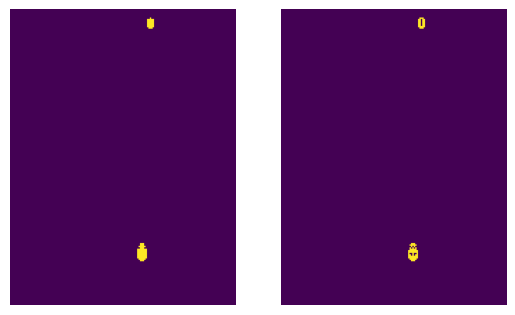

In [ ]:
new_mask = check_neighbors(mask)

plt.subplot(1, 2,1)
plt.imshow(n_mask)
plt.axis("off")  # Hide the axis

plt.subplot(1, 2,2)
plt.imshow(mask)
plt.axis("off")  # Hide the axis
plt.show()

In [50]:
np.where(new_mask)[0].shape

(181,)

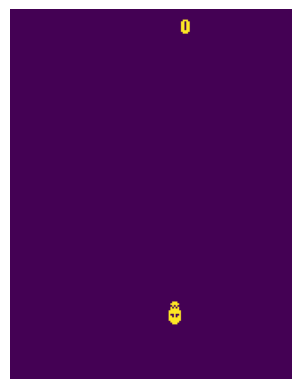

In [30]:
plt.imshow(binary_image)
plt.axis("off")  # Hide the axis
plt.show()

In [29]:
contours

(array([[[ 92, 166]],
 
        [[ 91, 167]],
 
        [[ 92, 168]],
 
        [[ 91, 169]],
 
        [[ 91, 170]],
 
        [[ 90, 171]],
 
        [[ 90, 176]],
 
        [[ 92, 178]],
 
        [[ 94, 178]],
 
        [[ 96, 176]],
 
        [[ 96, 171]],
 
        [[ 95, 170]],
 
        [[ 95, 169]],
 
        [[ 94, 168]],
 
        [[ 95, 167]],
 
        [[ 94, 166]]], dtype=int32),
 array([[[ 98,   6]],
 
        [[ 97,   7]],
 
        [[ 97,  12]],
 
        [[ 98,  13]],
 
        [[100,  13]],
 
        [[101,  12]],
 
        [[101,   7]],
 
        [[100,   6]]], dtype=int32))